# Introduction:

We are going to work with a dataset on the job outcomes of students who graduated from American colleges between 2010 and 2012.
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

Rank - Rank by median earnings (the dataset is ordered by this column).
Major_code - Major code.
Major - Major description.
Major_category - Category of major.
Total - Total number of people with major.
Sample_size - Sample size (unweighted) of full-time.
Men - Male graduates.
Women - Female graduates.
ShareWomen - Women as share of total.
Employed - Number employed.
Median - Median salary of full-time, year-round workers.
Low_wage_jobs - Number in low-wage service jobs.
Full_time - Number employed 35 hours or more.
Part_time - Number employed less than 35 hours.

In [75]:
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
recent_grads = pd.read_csv("recent-grads.csv")

In [56]:
# Printing the first 5 Rows to get familiarized with the dataset
print (recent_grads.head())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

In [76]:
# Data Cleaning:
# Deleting the rows with missing value #

raw_data_count = len(recent_grads.index)
print("Original number of rows: ", raw_data_count)

recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads.index)
print("Cleaned number of rows:  ", cleaned_data_count)

Original number of rows:  173
Cleaned number of rows:   172


# Pandas Scatter Plot (1):

Observing the relation between Share of Women in a Major and Unemployment rate among the graduates. From the scatter plot, we can not find any obvious relation between the Share of Women and Unemployment rate.

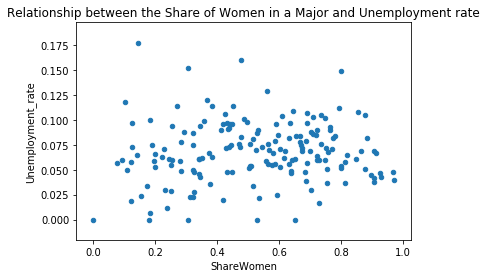

In [61]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title= 'Relationship between the Share of Women in a Major and Unemployment rate')

# Pandas scatter plot (2):

Observing the relation between popular Majors and Median Salary.
From the scatter plot, we can not find a clear relationship between the two. That means, the graduates did not choose their majors only based on potential future earnings.

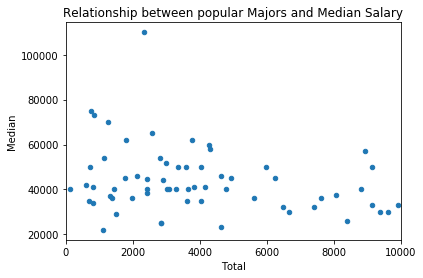

In [62]:
recent_grads.plot(x='Total', y='Median', kind='scatter', xlim =(0,10000), title = 'Relationship between popular Majors and Median Salary')

# Pandas Histogram:

In the following histogram, we are trying to find the salary range with the most number of students.
In other words, it can give us an indication of the salary range a graduate can expect after graduation
From the histogram, we can find that a graduate (here we are not grouping by Major) may expect to get a salary of around 30 - 37 thousand.

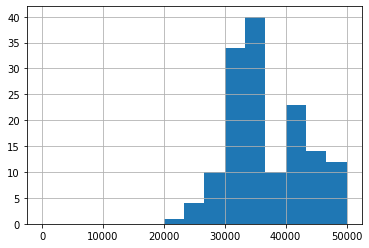

In [63]:
recent_grads['Median'].hist(bins=15, range=(0,50000))

# Pandas Scatter Matrix:

We are now comparing the Share of Women and Median Salary in a Scatter Matrix.
We can observe that, when the share of Women in a Major is higher, the graduates tend to earn less Median salary.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263FF7F6808>,
      dtype=object)

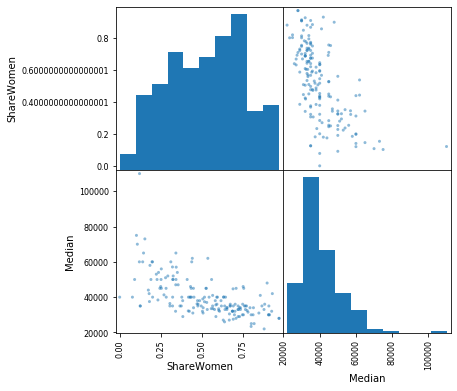

In [65]:
scatter_matrix(recent_grads[['ShareWomen', 'Median']], figsize=(6,6))

# Pandas Bar Plots:

We are going to find the top ten Majors which pay the highest Median Salary.
First, we sort (in descending order) the DataFrame based on Median Salary. Then Drawing Bar Plots to visually present the finding.

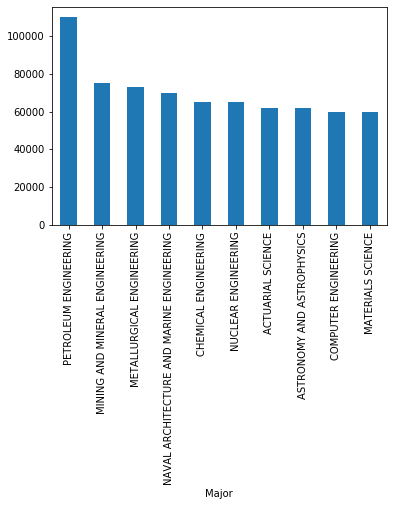

In [60]:
sorted_recent_grads = recent_grads.sort_values('Median', ascending =False).copy() 
sorted_recent_grads[:10].plot.bar(x='Major', y='Median', legend=False)